In [1]:
# Install all dependencies
%pip install torch librosa scikit-learn numpy pandas matplotlib ipython tqdm

  Using cached torch-2.2.0-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached scipy-1.12.0-cp311-cp311-win

In [1]:
import os, torch, librosa, librosa.display
import numpy as np, pandas as pd, matplotlib.pyplot as plt

from IPython.display import Audio
from tqdm.auto import tqdm

audio_root_folder = './archive/data'

C:\Users\zheng\AppData\Local\Temp\ipykernel_28628\2111317519.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import numpy as np, pandas as pd, matplotlib.pyplot as plt
c:\Users\zheng\Data\Georgia Tech Courses\GT Spring 2024 courses\CS 4641\MLProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labels_csv = os.path.join(audio_root_folder, 'features_30_sec.csv')
df = pd.read_csv(labels_csv, header=0)
df.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
num_audios = len(df['filename'])
labels = df['label'].unique()
num_labels = len(labels)

num_audios, num_labels, labels

(1000,
 10,
 array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock'], dtype=object))

Display one random audio

In [4]:
rand_row = np.random.choice(num_audios, 1)
rand_entry = df.iloc[rand_row]
rand_entry

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
515,jazz.00015.wav,661794,0.332758,0.090788,0.062395,0.000622,1782.224,101455.024175,2061.905525,90702.702271,...,58.258858,-6.649531,84.433502,4.866955,96.986656,0.698277,72.839432,0.463443,80.47374,jazz


In [5]:
example_label, example_filename = rand_entry['label'].to_numpy()[0], rand_entry['filename'].to_numpy()[0]
example_audio_path = os.path.join(audio_root_folder, 'genres_original', example_label, example_filename)

example_audio, sample_rate = librosa.load(example_audio_path)
Audio(example_audio, rate=sample_rate)

Plot features of an audio

In [7]:
import matplotlib.pyplot as plt
from audio_toolbox.preprocess import AudioVisualizer

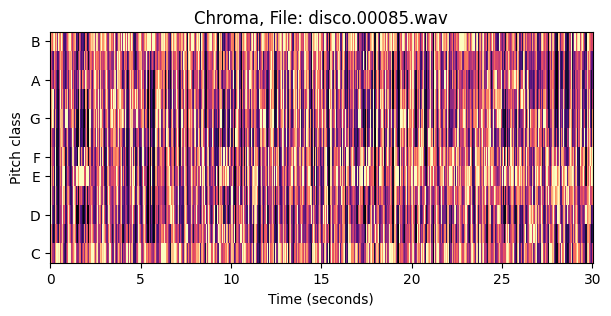

In [8]:
chroma = AudioVisualizer('chroma_stft')
fig = chroma.visualize(audio=example_audio, filename=example_filename,)
plt.show();

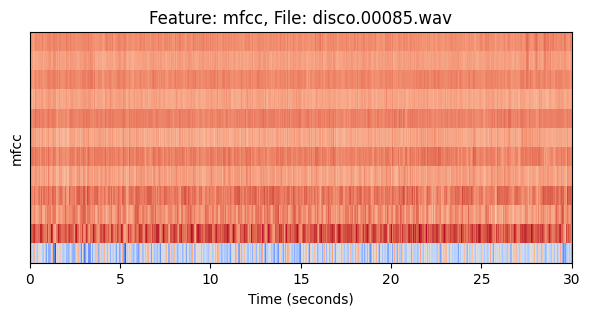

In [9]:
mfcc = AudioVisualizer('mfcc')
fig = mfcc.visualize(audio=example_audio, filename=example_filename, n_mfcc=12)
plt.show();